Student Name & Number = Ashish Anant Kale (20006228)

DataSet Link : https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

### Data Understanding

In [2]:
# Path to the uploaded file
file_path = 'bank-additional-full.csv'

# Load the dataset
df = pd.read_csv(file_path, sep=';')

# Display the first few rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Display the first few rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Describe the dataset to get summary statistics
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Data Proprocessing

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [8]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [9]:
# Split the data into features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

X_train_num = X_train[numerical_cols].copy()
X_train_cat = X_train[categorical_cols].copy()

X_test_num = X_test[numerical_cols].copy()
X_test_cat = X_test[categorical_cols].copy()

In [12]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in X_train_cat.columns:
    X_train_cat.loc[:, col] = label_encoder.fit_transform(X_train_cat[col])
    X_test_cat.loc[:, col] = label_encoder.transform(X_test_cat[col])

# Combine the processed categorical and numerical data
X_train_processed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_cat], axis=1)

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Convert scaled arrays back to dataframes
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=numerical_cols, index=X_train_num.index)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=numerical_cols, index=X_test_num.index)

# Combine the processed categorical and scaled numerical data
X_train_final = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_cat], axis=1)

In [14]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

### Data Visualization

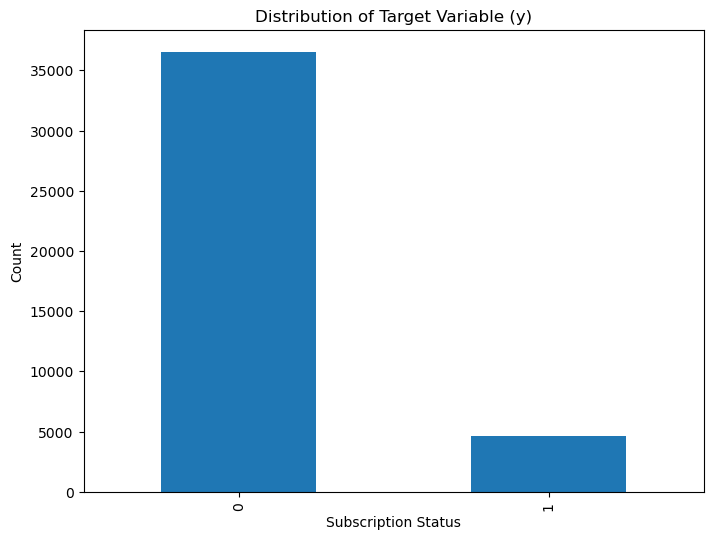

In [15]:
# 1. Bar Plot: Distribution of the target variable 'y'
plt.figure(figsize=(8, 6))
df['y'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

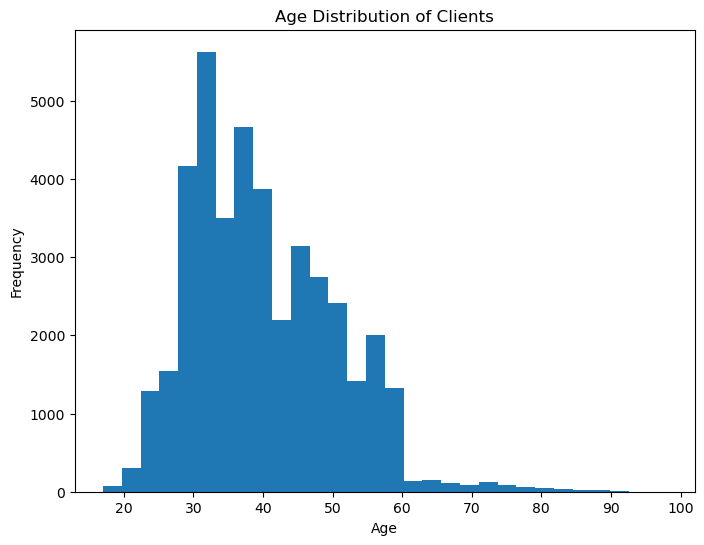

In [16]:
# 2. Histogram: Age distribution of clients
plt.figure(figsize=(8, 6))
df['age'].plot(kind='hist', bins=30)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


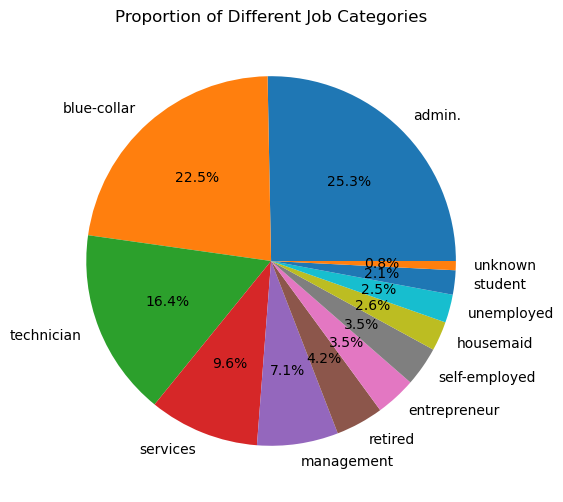

In [17]:
# 3. Pie Chart: Proportion of different job categories
plt.figure(figsize=(8, 6))
df['job'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Different Job Categories')
plt.ylabel('')
plt.show()

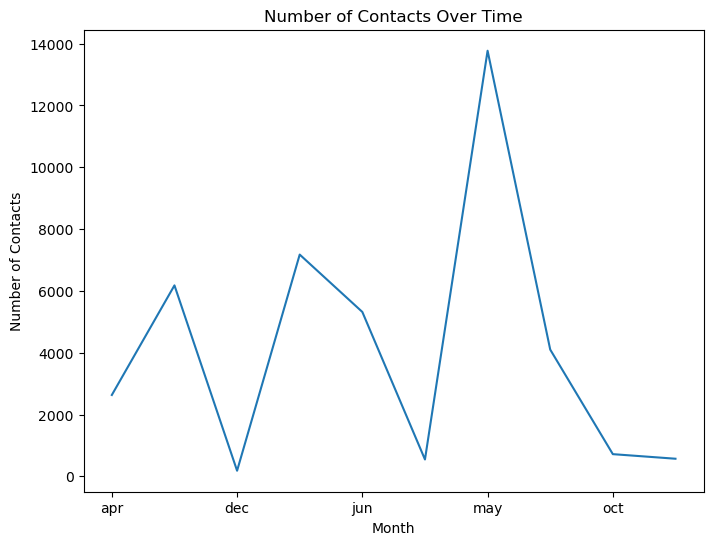

In [18]:
# 4. Line Plot: Number of contacts over time
plt.figure(figsize=(8, 6))
df.groupby('month')['campaign'].count().plot(kind='line')
plt.title('Number of Contacts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.show()

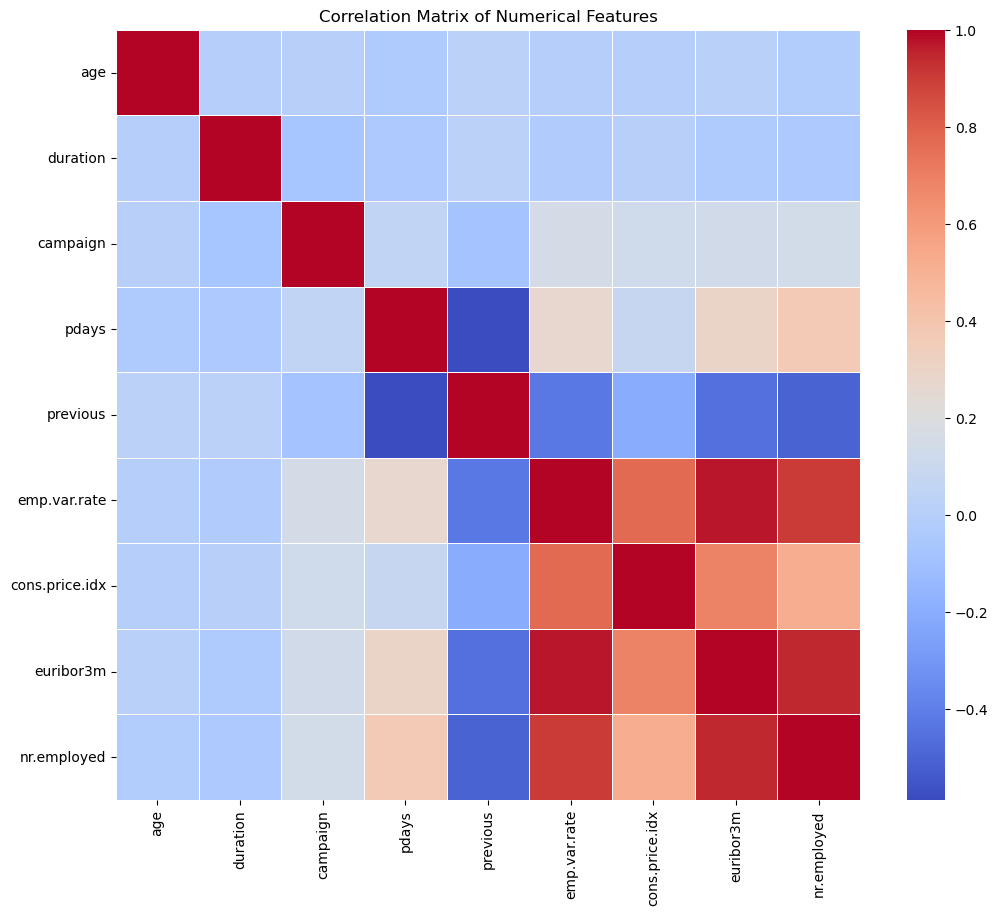

In [19]:
# 1. Heatmap: Correlation matrix of the numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

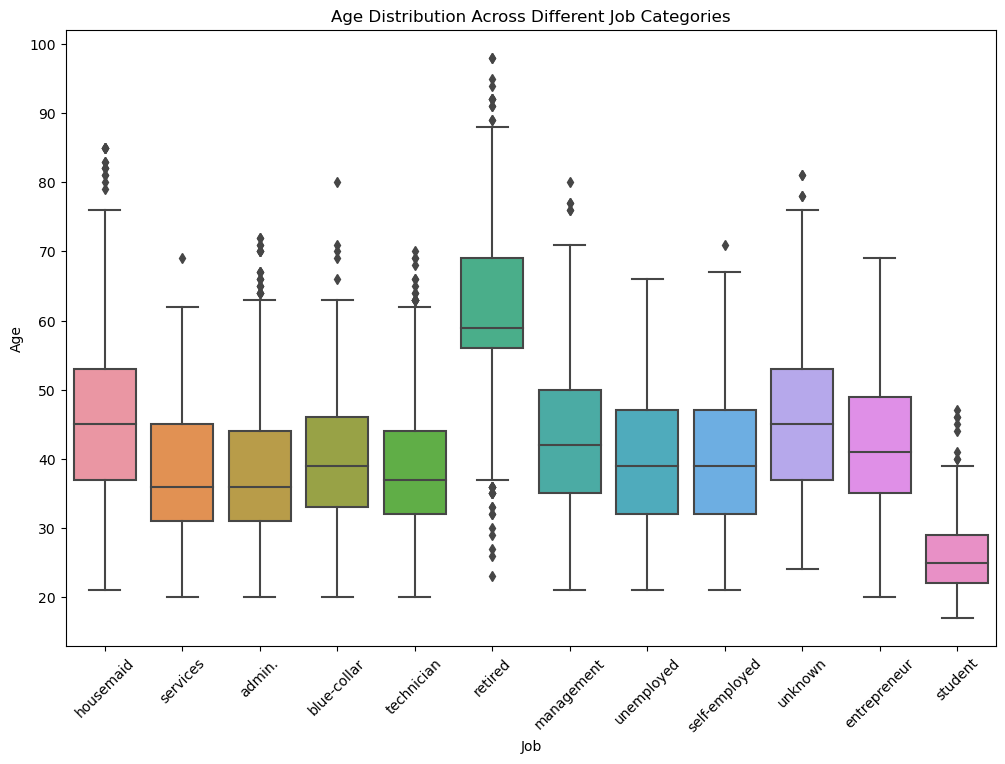

In [20]:
# 2. Box Plot: Age distribution across different job categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='job', y='age', data=df)
plt.title('Age Distribution Across Different Job Categories')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

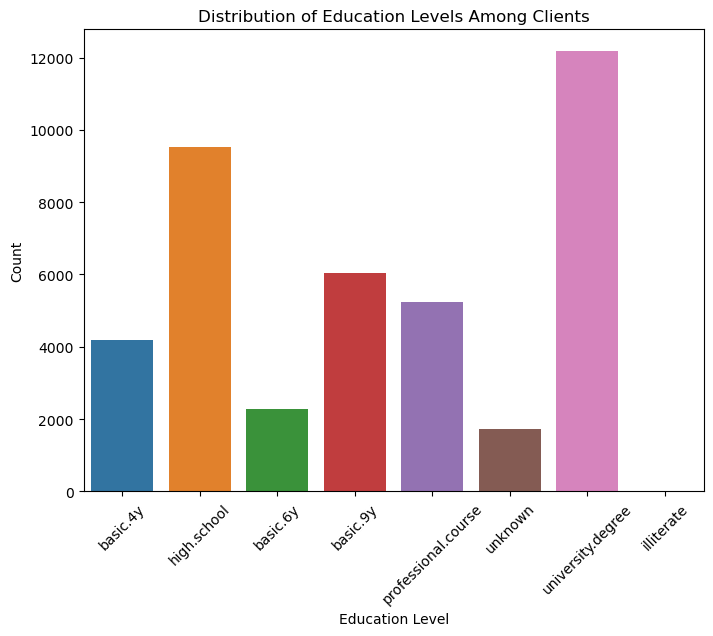

In [21]:
# 3. Count Plot: Distribution of education levels among clients
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=df)
plt.title('Distribution of Education Levels Among Clients')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\kalea\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


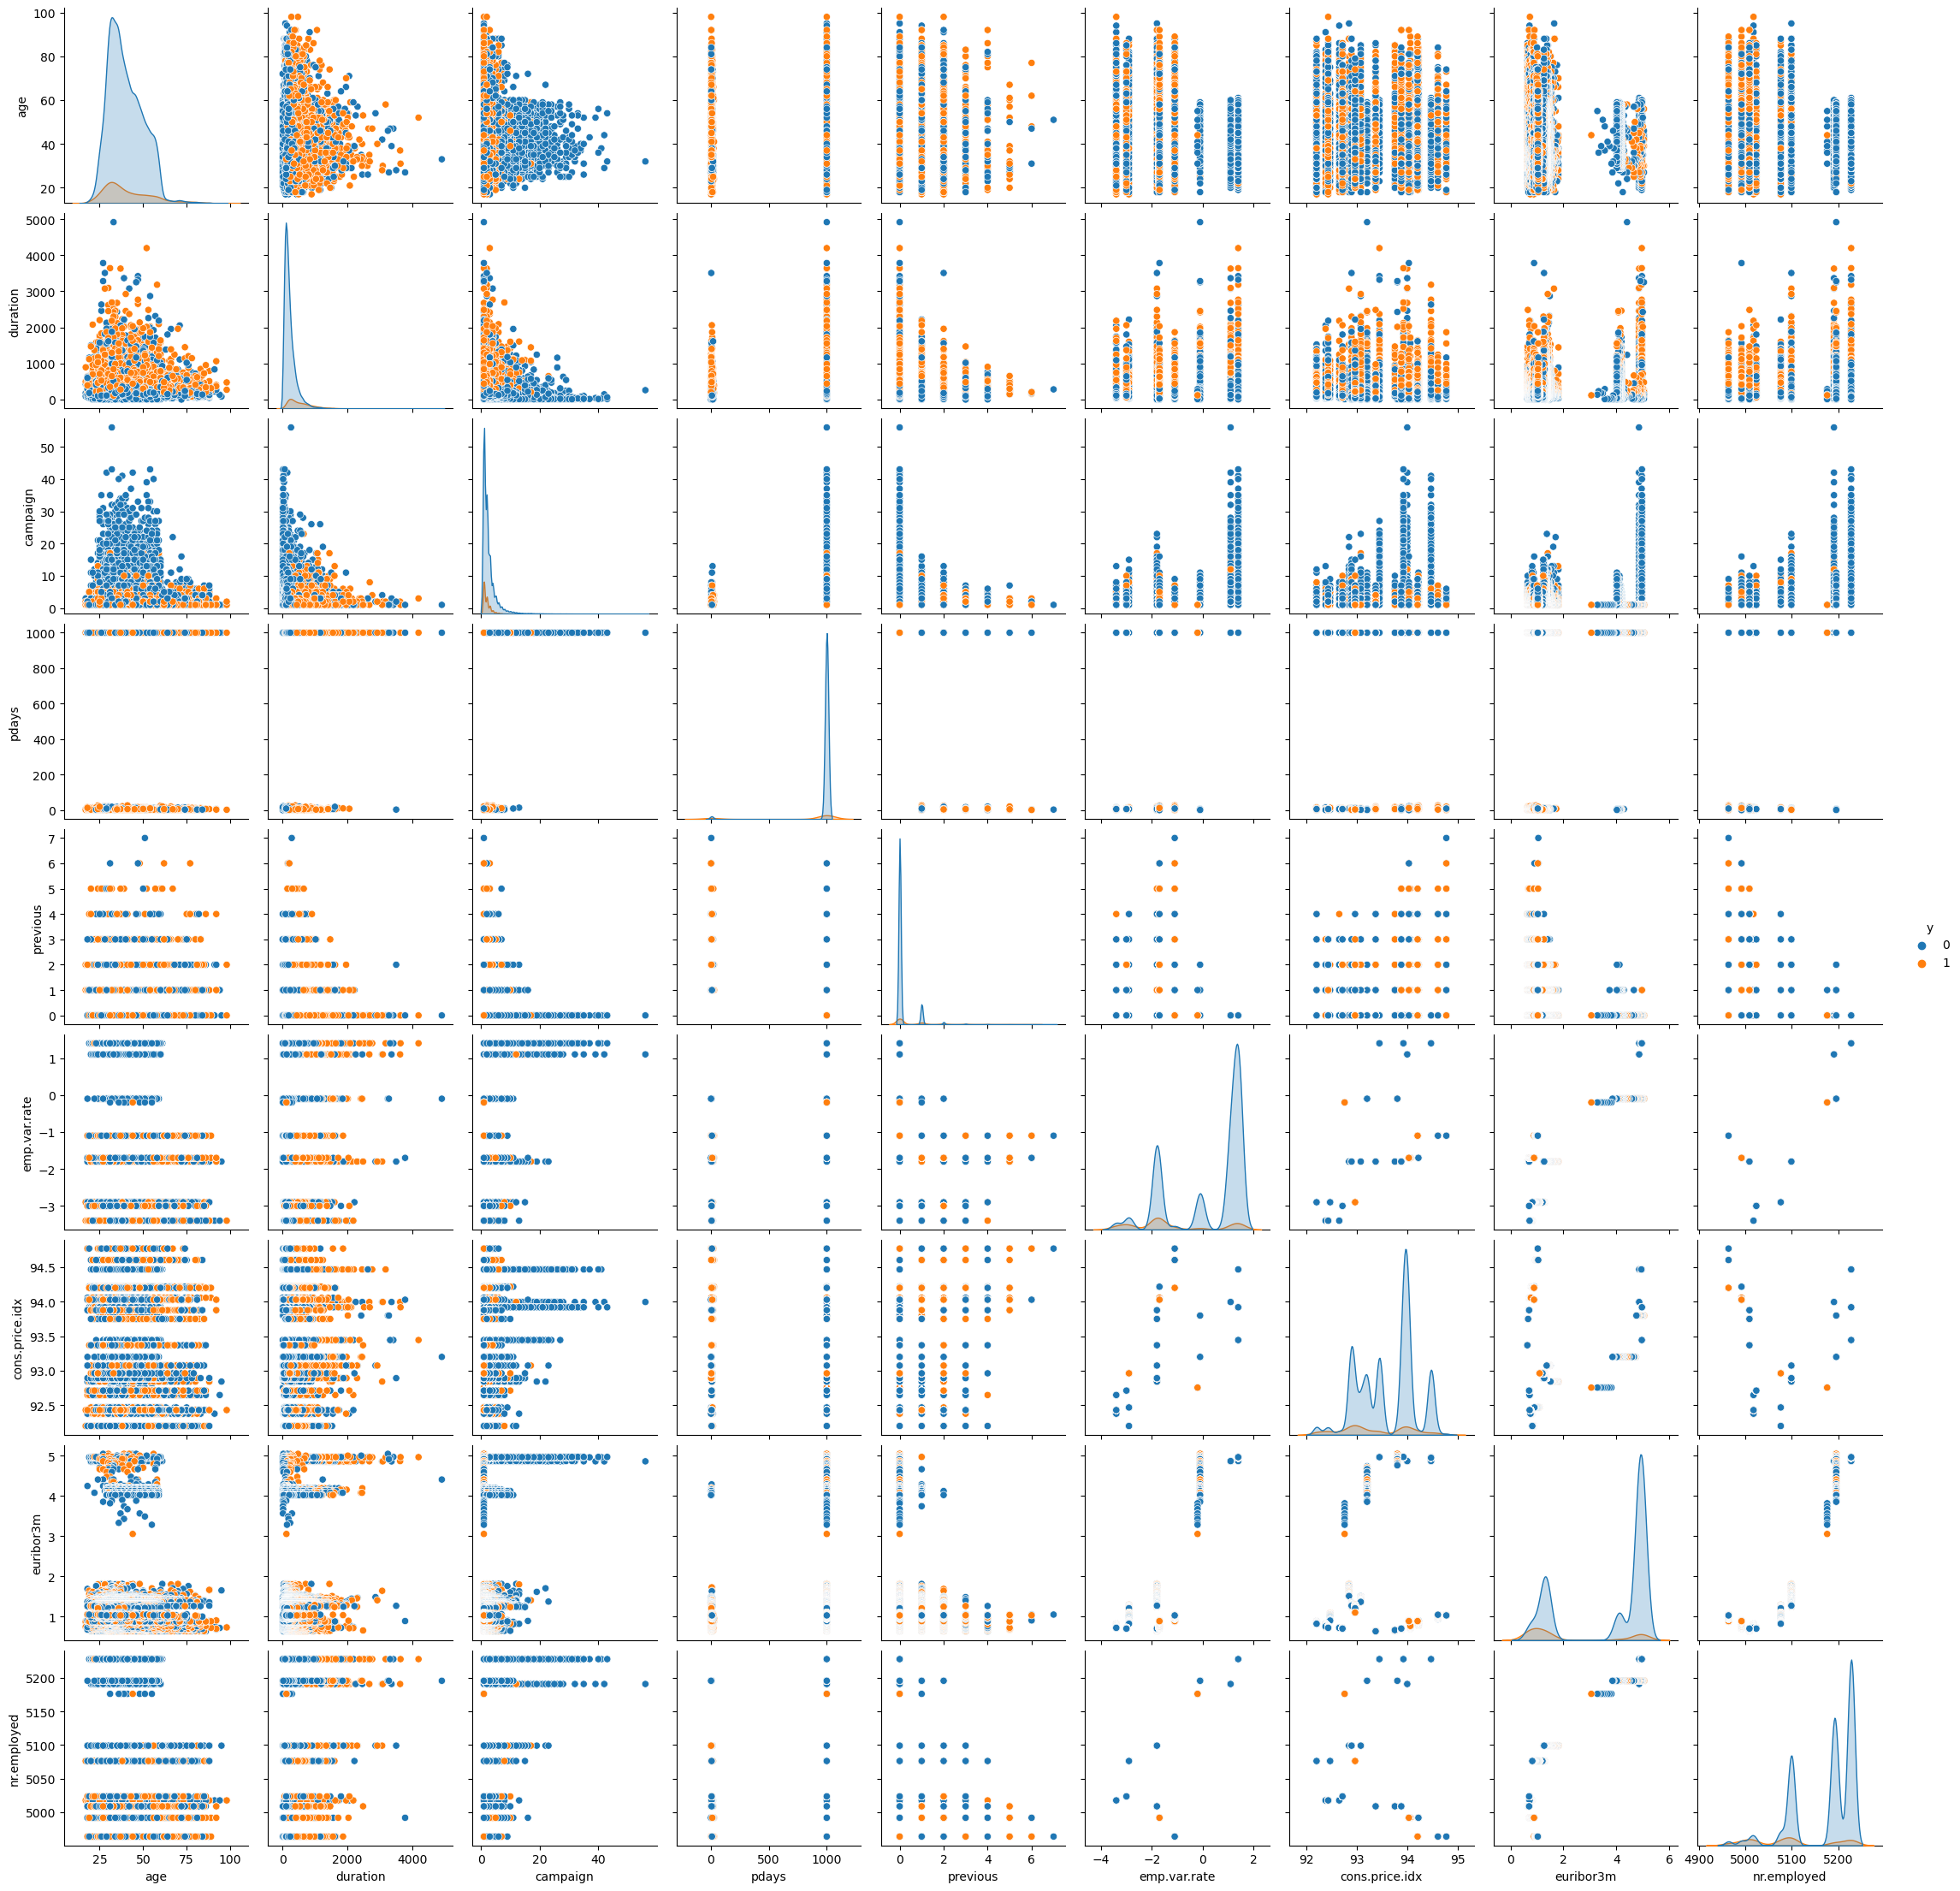

In [22]:
# 4. Pair Plot: Relationships between various numerical features
sns.pairplot(df, vars=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'], hue='y')
plt.show()

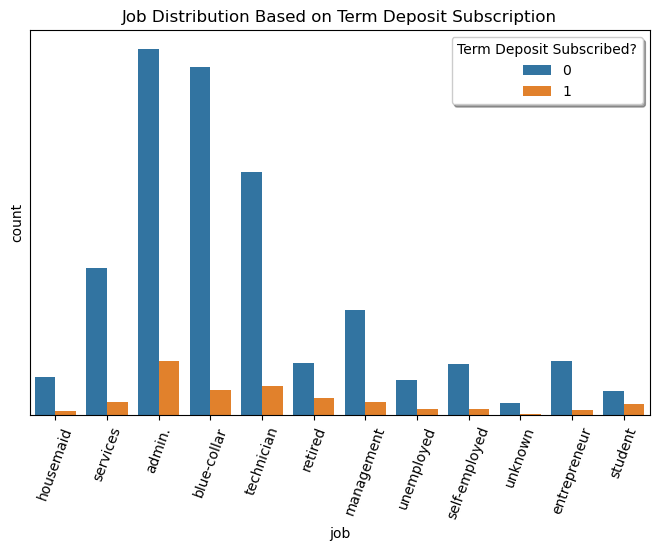

In [23]:
plt.figure(figsize=(8, 5))
plt.title('Job Distribution Based on Term Deposit Subscription')
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='Term Deposit Subscribed?', ncol=1, fancybox=True, shadow=True)
plt.show()

### Machine Learning Models Implementation

In [24]:
# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

Logistic Regression
[[7791 1353]
 [ 143 1010]]


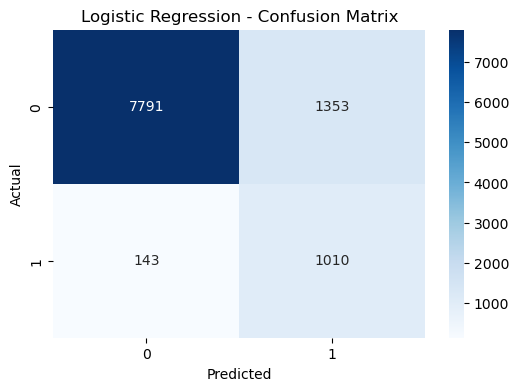

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9144
           1       0.43      0.88      0.57      1153

    accuracy                           0.85     10297
   macro avg       0.70      0.86      0.74     10297
weighted avg       0.92      0.85      0.87     10297

Roc AUC :  0.9355486163752514


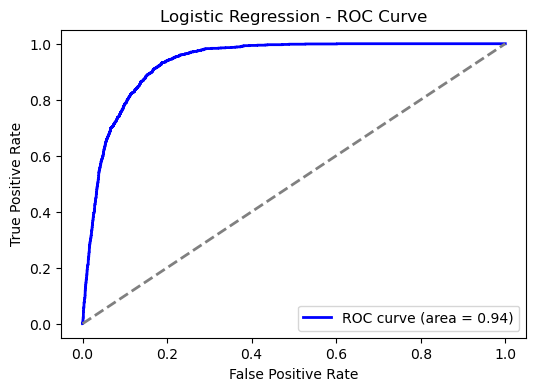

Decision Tree
[[8474  670]
 [ 506  647]]


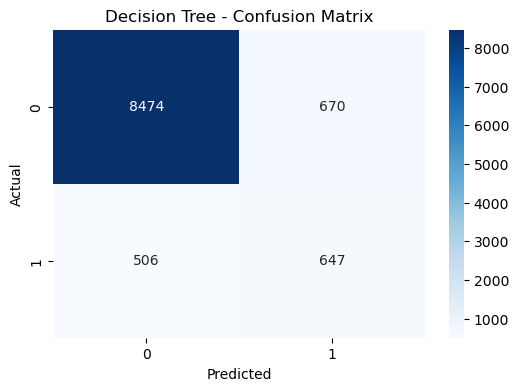

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      9144
           1       0.49      0.56      0.52      1153

    accuracy                           0.89     10297
   macro avg       0.72      0.74      0.73     10297
weighted avg       0.89      0.89      0.89     10297

Roc AUC :  0.7439363742801881


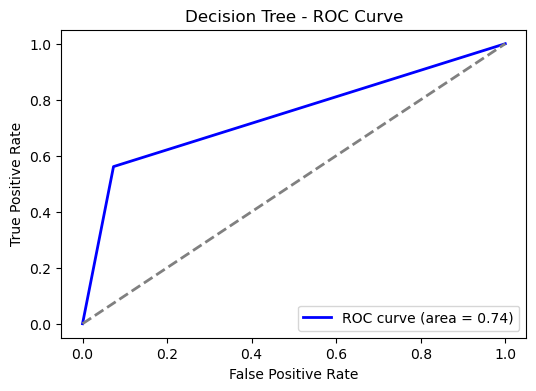

Naive Bayes
[[7151 1993]
 [ 282  871]]


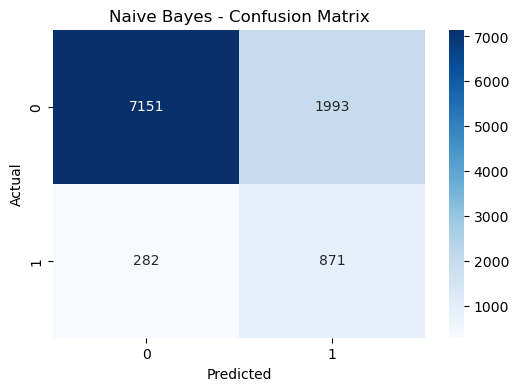

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      9144
           1       0.30      0.76      0.43      1153

    accuracy                           0.78     10297
   macro avg       0.63      0.77      0.65     10297
weighted avg       0.89      0.78      0.81     10297

Roc AUC :  0.842943472048648


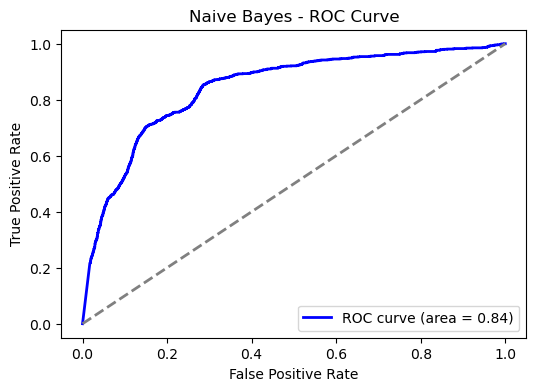

K-Nearest Neighbors
[[7808 1336]
 [ 243  910]]


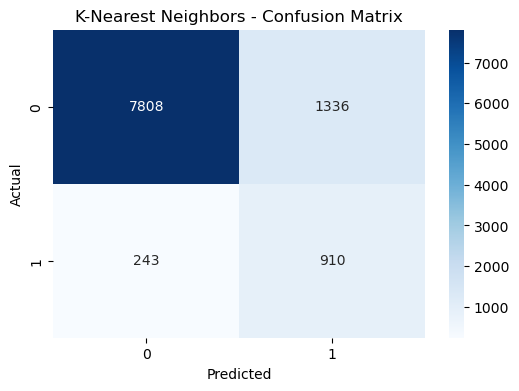

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      9144
           1       0.41      0.79      0.54      1153

    accuracy                           0.85     10297
   macro avg       0.69      0.82      0.72     10297
weighted avg       0.91      0.85      0.87     10297

Roc AUC :  0.8708691674273586


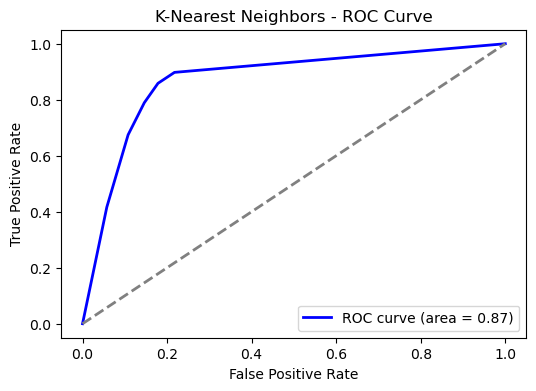

In [25]:
results = []

for model_name, model in models.items():
    print (model_name)
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_final)
    y_prob = model.predict_proba(X_test_final)[:, 1]
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    print(f'Classification Report for {model_name}:')
    cr = classification_report(y_test, y_pred)
    print(cr)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    print("Roc AUC : ", roc_auc)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    # Collect results
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })


In [26]:
# Comparison Table
results_df = pd.DataFrame(results)
print('Comparison Table:')
print(results_df)

Comparison Table:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.854715   0.427423  0.875976  0.574516
1        Decision Tree  0.885792   0.491268  0.561145  0.523887
2          Naive Bayes  0.779062   0.304120  0.755421  0.433657
3  K-Nearest Neighbors  0.846654   0.405165  0.789245  0.535452
